In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 미로 구현

In [2]:
def show_maze():
    fig = plt.figure(figsize=(5, 5))
    ax = plt.gca()

    plt.plot([1, 1], [0, 1], color='red', linewidth=2)
    plt.plot([1, 2], [2, 2], color='red', linewidth=2)
    plt.plot([2, 2], [2, 1], color='red', linewidth=2)
    plt.plot([2, 3], [1, 1], color='red', linewidth=2)

    plt.text(0.5, 2.5, "S0", size=14, ha='center')
    plt.text(1.5, 2.5, "S1", size=14, ha='center')
    plt.text(2.5, 2.5, "S2", size=14, ha='center')
    plt.text(0.5, 1.5, "S3", size=14, ha='center')
    plt.text(1.5, 1.5, "S4", size=14, ha='center')
    plt.text(2.5, 1.5, "S5", size=14, ha='center')
    plt.text(0.5, 0.5, "S6", size=14, ha='center')
    plt.text(1.5, 0.5, "S7", size=14, ha='center')
    plt.text(2.5, 0.5, "S8", size=14, ha='center')
    plt.text(0.5, 2.3, "START", ha='center')
    plt.text(2.5, 0.3, "GOAL", ha='center')

    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, \
                    labelbottom=False, right=False, left=False, labelleft=False)

    line, = ax.plot([0.5], [2.5], marker="o", color="g", markersize=60)
    plt.show()
    
    return fig, line, ax

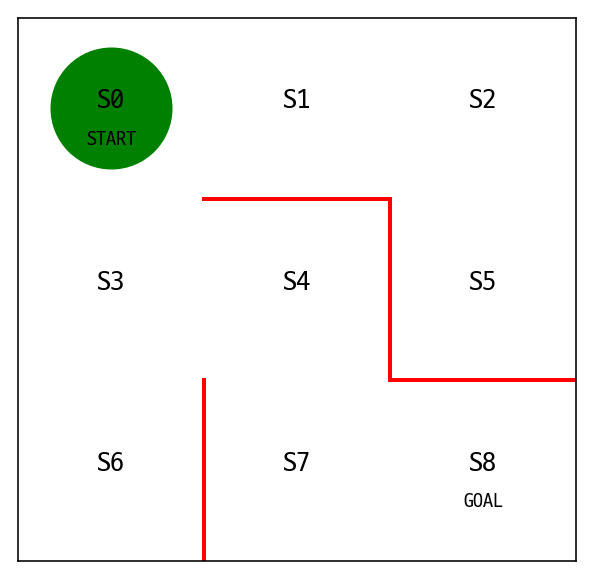

In [3]:
fig, line, ax = show_maze()

## Policy 설정
- 표형식 표현 (tabular representation) 으로 설정
- 행은 상태 S0~S7, 열은 행동 방향 (상/우/하/좌)

#### 파라미터 초기값 `theta_0` 설정

In [4]:
theta_0 = np.array([[np.nan, 1, 1, np.nan],      #S0
                    [np.nan, 1, np.nan, 1],      #S1
                    [np.nan, np.nan, 1, 1],      #S2     
                    [1, 1, 1, np.nan],           #S3
                    [np.nan, np.nan, 1, 1],      #S4
                    [1, np.nan, np.nan, np.nan], #S5
                    [1, np.nan, np.nan, np.nan], #S6
                    [1, 1, np.nan, np.nan]])     #S7

#### theta를 정책으로 변환하는 함수
- 정책은 각 방향으로 이동하는 확률이므로 nan을 제외한 나머지 값을 합하면 1이 되도록 확률값으로 변환

In [5]:
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape
    
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        
    pi = np.nan_to_num(pi)
    
    return pi

In [6]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

#### 1단계 이동 후의 상태 s를 계산하는 함수

In [7]:
def get_next_s(pi, s):
    direction =  ["up", "right", "down", "left"]
    
    # 네 가지 direction 중 각 확률대로 direction을 random choice
    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction == "up":
        s_next = s - 3
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 3
    elif next_direction == "left":
        s_next = s - 1
        
    return s_next

## Model 구현
- 정책 pi 에 따라 목표지점에 도달할 때까지 계속 에이전트를 이동시키는 함수

In [8]:
def goal_maze(pi):
    s = 0
    state_history = [0]
    
    while True:
        next_s = get_next_s(pi, s)
        state_history.append(next_s)
        
        if next_s == 8:
            break
        else:
            s = next_s
        
    return state_history

- 정책을 바꾸지 않고 그냥 Goal에 도달할 때까지 이동시킨 History를 구해보자.

In [9]:
for i in range(5):
    state_history = goal_maze(pi_0)

    print(state_history)
    print("목표까지 도달하는 데에 걸린 단계 수 :", len(state_history)-1)
    print('\n')

[0, 1, 0, 1, 0, 1, 0, 3, 6, 3, 0, 1, 0, 1, 0, 3, 4, 3, 4, 7, 4, 7, 4, 7, 8]
목표까지 도달하는 데에 걸린 단계 수 : 24


[0, 3, 0, 3, 4, 3, 0, 3, 6, 3, 4, 7, 4, 7, 4, 3, 4, 3, 6, 3, 0, 1, 0, 1, 2, 1, 0, 3, 4, 3, 6, 3, 0, 1, 0, 1, 0, 1, 0, 3, 4, 3, 6, 3, 0, 1, 0, 1, 0, 3, 4, 3, 4, 7, 8]
목표까지 도달하는 데에 걸린 단계 수 : 54


[0, 3, 6, 3, 0, 3, 0, 1, 2, 1, 0, 1, 2, 1, 0, 3, 6, 3, 4, 7, 8]
목표까지 도달하는 데에 걸린 단계 수 : 20


[0, 3, 0, 3, 4, 7, 4, 7, 4, 3, 6, 3, 6, 3, 6, 3, 0, 1, 2, 1, 0, 3, 4, 3, 0, 3, 6, 3, 0, 3, 6, 3, 6, 3, 4, 3, 4, 7, 4, 7, 4, 3, 0, 3, 4, 7, 8]
목표까지 도달하는 데에 걸린 단계 수 : 46


[0, 3, 4, 7, 4, 7, 8]
목표까지 도달하는 데에 걸린 단계 수 : 6




- 엄청 랜덤으로 움직인다

## Agent의 움직임을 동영상으로 시각화 하기

In [10]:
from matplotlib import animation
from IPython.display import HTML

In [11]:
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    state = state_history[i]
    x = (state % 3) + 0.5
    y = 2.5 - state // 3
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history), \
                           interval=200, repeat=False)
HTML(anim.to_jshtml())

---

## 정책경사 (policy gradient) 알고리즘 구현

#### 소프트맥스 함수를 이용해서 정책 pi를 변환

In [12]:
def softmax_convert_into_pi_from_theta(theta, beta=1.0):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    
    exp_theta = np.exp(beta * theta)
    
    for i in range(0, m):
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        
    pi = np.nan_to_num(pi)
    
    return pi

In [13]:
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

### pi에 따라 행동 a와 다음 상태 s 를 출력하는 모델

In [14]:
def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    
    # 네 가지 direction 중 각 확률대로 direction을 random choice
    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction == "up":
        action = 0
        s_next = s - 3
    elif next_direction == "right":
        action = 1
        s_next = s + 1
    elif next_direction == "down":
        action = 2
        s_next = s + 3
    elif next_direction == "left":
        action = 3
        s_next = s - 1
        
    return (action, s_next)

- 모델 함수도 action history와 state history를 모두 반환

In [15]:
def goal_maze_ret_s_a(pi):
    s = 0
    s_a_history = [[0, np.nan]]
    
    while True:
        action, next_s = get_action_and_next_s(pi, s)
        
        # action은 현재 마지막 state의 action으로 저장
        s_a_history[-1][1] = action
        # state는 새롭게 append
        s_a_history.append([next_s, np.nan])
        
        if next_s == 8:
            break
        else:
            s = next_s
        
    return s_a_history

In [16]:
for i in range(5):
    s_a_history = goal_maze_ret_s_a(pi_0)

    print(s_a_history)
    print("목표까지 도달하는 데에 걸린 단계 수 :", len(s_a_history)-1)
    print('\n')

[[0, 1], [1, 3], [0, 2], [3, 2], [6, 0], [3, 1], [4, 2], [7, 0], [4, 2], [7, 0], [4, 3], [3, 1], [4, 3], [3, 1], [4, 2], [7, 1], [8, nan]]
목표까지 도달하는 데에 걸린 단계 수 : 16


[[0, 2], [3, 0], [0, 2], [3, 0], [0, 2], [3, 1], [4, 3], [3, 1], [4, 2], [7, 0], [4, 3], [3, 2], [6, 0], [3, 2], [6, 0], [3, 0], [0, 2], [3, 1], [4, 2], [7, 1], [8, nan]]
목표까지 도달하는 데에 걸린 단계 수 : 20


[[0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 1], [2, 3], [1, 3], [0, 2], [3, 0], [0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 1], [4, 2], [7, 1], [8, nan]]
목표까지 도달하는 데에 걸린 단계 수 : 18


[[0, 1], [1, 1], [2, 3], [1, 3], [0, 2], [3, 1], [4, 3], [3, 1], [4, 2], [7, 0], [4, 3], [3, 2], [6, 0], [3, 1], [4, 2], [7, 1], [8, nan]]
목표까지 도달하는 데에 걸린 단계 수 : 16


[[0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 3], [0, 2], [3, 2], [6, 0], [3, 0], [0, 1], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 3], [0, 2], [3,

### 정책경사 알고리즘

$$\theta_{s_i, a_j} = \theta_{s_i, a_j} + \eta \cdot \Delta \theta_{s, a_j}$$   

$$\Delta \theta_{s, a_j} = \{N(s_i, a_j) + P(s_i, a_j) N(s_i, a)\} / T $$

- $\theta_{s_i, a_j}$ : 상태 $s_i$ 에서 행동 $a_j$ 를 취할 확률값


- $\eta$ : 학습률


- $N(s_i, a_j)$ : 상태 $s_i$ 에서 행동 $a_j$ 를 취했던 횟수


- $P(s_i, a_j)$ : 현재 정책 하에서 상태 $s_i$ 일 때 행동 $a_j$ 를 취할 확률


- $N(s_i, a)$ : 상태 $s_i$ 에서 행동을 취한 횟수의 합계


- $T$ : 목표 지점에 이르기까지 걸린 모든 단계의 수

In [17]:
def update_theta(theta, pi, s_a_history, eta=0.1):
    T = len(s_a_history) - 1
    
    [m, n] = theta.shape
    
    delta_theta = theta.copy()
    
    for i in range(0, m):
        
        # 상태가 i인 것만 저장
        SA_i = [SA for SA in s_a_history if SA[0] == i]
        N_i = len(SA_i)
        
        for j in range(0, n):
            if not (np.isnan(theta[i, j])):
                
                # 상태 i 에서 행동 j 인 것만 저장
                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                N_ij = len(SA_ij)
                
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T
                
    new_theta = theta + eta * delta_theta
    
    return new_theta

In [18]:
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
pi

array([[0.        , 0.5005    , 0.4995    , 0.        ],
       [0.        , 0.5005    , 0.        , 0.4995    ],
       [0.        , 0.        , 0.50199999, 0.49800001],
       [0.33377793, 0.33311104, 0.33311104, 0.        ],
       [0.        , 0.        , 0.5015    , 0.4985    ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5005    , 0.4995    , 0.        , 0.        ]])

### 미로에서 목표지점에 갈 때까지 파라미터 업데이트

In [19]:
stop_epsilon = 10**-4

theta = theta_0
pi = pi_0

is_continue = True
episode = 1
step_to_goals = []

while is_continue:
    s_a_history = goal_maze_ret_s_a(pi)
    new_theta = update_theta(theta, pi, s_a_history, eta=0.2)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)
    
    update_range = np.sum(np.abs(new_pi - pi))
    
    if (episode < 10) or ((episode < 200) and (episode % 10 == 0)) or (episode % 100 == 0):
        print("episode: {}  |  update range : {}  |   step to goal : {}".format(episode, \
                                                                                update_range, \
                                                                                len(s_a_history)-1))    
    
    if update_range < stop_epsilon:
        is_continue = False
        print("episode: {}  |  update range : {}  |   step to goal : {}".format(episode, \
                                                                                update_range, \
                                                                                len(s_a_history)-1)) 
    else:
        theta = new_theta
        pi = new_pi
        episode += 1
        step_to_goals.append(len(s_a_history)-1)

episode: 1  |  update range : 0.09738863591011876  |   step to goal : 4
episode: 2  |  update range : 0.019015921602854036  |   step to goal : 98
episode: 3  |  update range : 0.021571390813639457  |   step to goal : 54
episode: 4  |  update range : 0.019946541093021852  |   step to goal : 24
episode: 5  |  update range : 0.036619366753654015  |   step to goal : 10
episode: 6  |  update range : 0.020993003468984417  |   step to goal : 14
episode: 7  |  update range : 0.025976214522718977  |   step to goal : 48
episode: 8  |  update range : 0.02437981852750809  |   step to goal : 56
episode: 9  |  update range : 0.031650021462837075  |   step to goal : 24
episode: 10  |  update range : 0.09386865715446824  |   step to goal : 4
episode: 20  |  update range : 0.08676815706367019  |   step to goal : 4
episode: 30  |  update range : 0.06399975559093768  |   step to goal : 16
episode: 40  |  update range : 0.021380725500079245  |   step to goal : 20
episode: 50  |  update range : 0.012742274

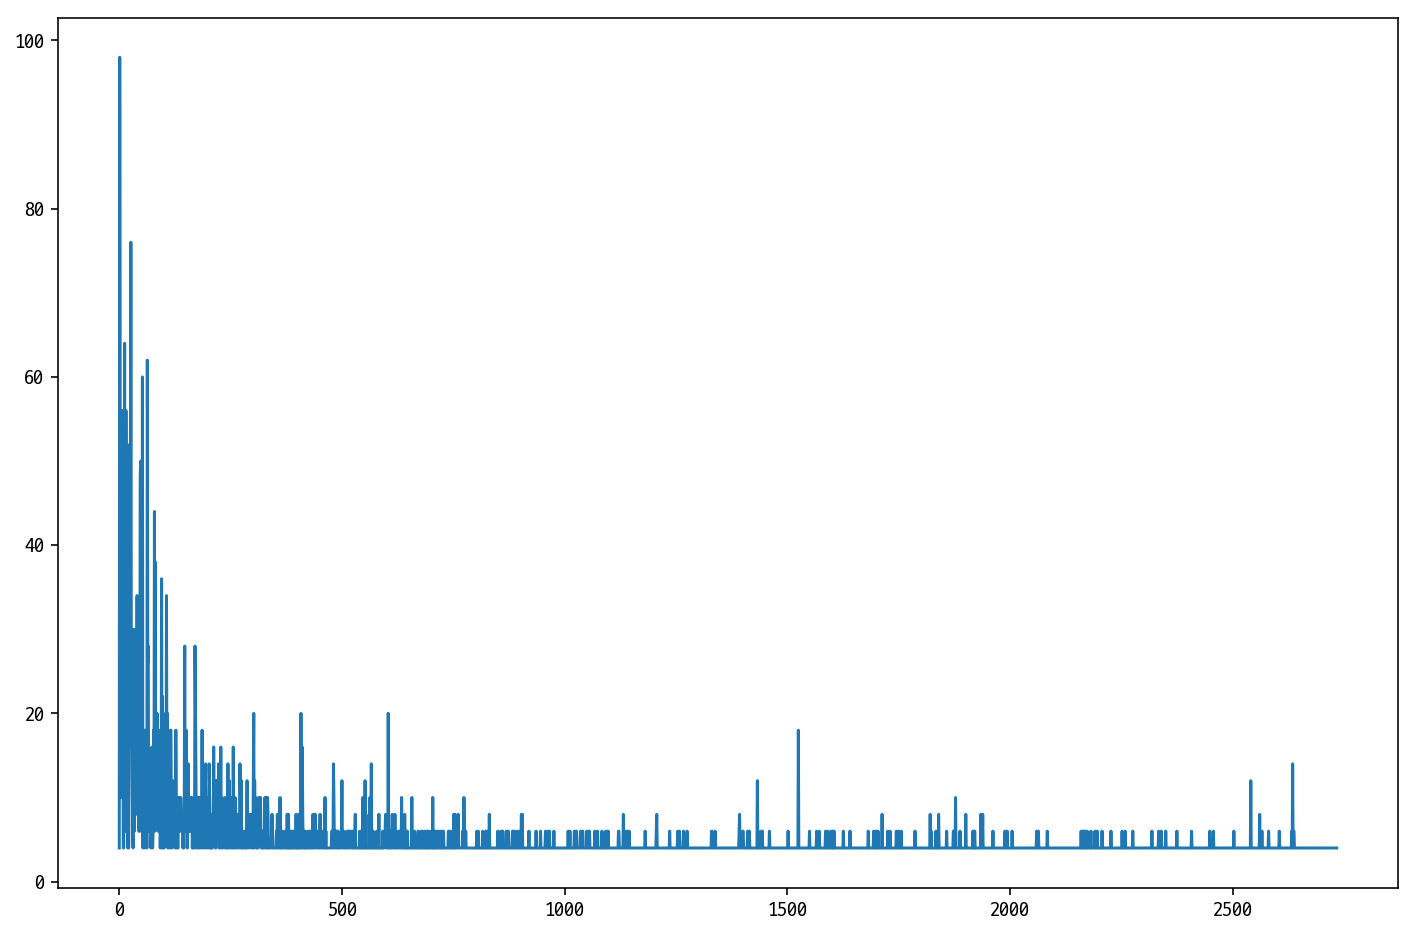

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(step_to_goals)
plt.show()

#### 최종 정책 확인

In [21]:
np.set_printoptions(precision=3, suppress=True)
pi

array([[0.   , 0.008, 0.992, 0.   ],
       [0.   , 0.299, 0.   , 0.701],
       [0.   , 0.   , 0.457, 0.543],
       [0.008, 0.984, 0.008, 0.   ],
       [0.   , 0.   , 0.988, 0.012],
       [1.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
       [0.01 , 0.99 , 0.   , 0.   ]])

In [22]:
direction = ["up", "right", "down", "left"]

for idx, i in enumerate(pi):
    print("S{} :".format(idx), direction[np.argmax(i)])

S0 : down
S1 : left
S2 : left
S3 : right
S4 : down
S5 : up
S6 : up
S7 : right


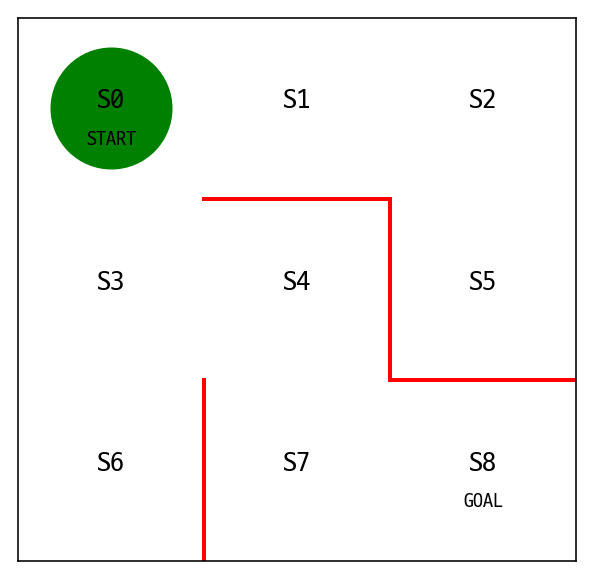

In [24]:
_ = show_maze()

- 최단경로인 S0, S3, S4, S7에서 뿐만 아니라, 나머지 위치에서도 벽을 탈출하는 방향으로 학습 되었음을 알 수 있다.. 오..

In [25]:
s_a_history

[[0, 2], [3, 1], [4, 2], [7, 1], [8, nan]]

In [26]:
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    state = s_a_history[i][0]
    x = (state % 3) + 0.5
    y = 2.5 - state // 3
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history), \
                           interval=200, repeat=False)
HTML(anim.to_jshtml())

---

## 가치반복 알고리즘 구현

### 보상
- $R_t$ : 어떤 시각 $t$에 받을 수 있는 즉각보상
    
    
- $G_t$ : 앞으로 받을 수 있으리라 예상되는 보상의 합계 (이 때, 미래에 대한 보상은 할인을 해야 한다.)


- $\gamma$ : time discount, 할인율


$$G_t =  R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \cdot \cdot \cdot$$

### 행동가치와 상태가치

- 행동가치 : $s = S7$ 이고, $a = right$ 이면 $S7$ 에서 $S8$ 로 이동하면서 목표에 다다르므로, 보상 $R_{t+1} = 1$ 을 받게 된다.


$$Q^\pi (s = 7, a = 1) = R_{t+1} = 1$$

- 상태가치 : 상태 $s$에서 정책 $\pi$ 를 따라 행동할 때 얻으리라 기대할 수 있는 할인 총 보상 $G_t$
    
    
- 여기서 벨만 방정식이 나오고, 벨만 방정식은 현재 상태의 상태 가치는 현재 상태에서 취할 수 있는 최적화 된 행동을 했을 때 받을 수 있는 즉각 보상과, 이동한 다음 상태의 상태가치에 할인율을 곱한 값의 합이다. 


- 벨만 방정식 : $V^\pi (s_t) = R_{s, a} + \gamma * V^\pi (s(s_t, a)) = R_{s, a} + \gamma * V^\pi (s_{t+1})$


- 여기서, **행동가치**는 "이 행동을 하면 보상을 얼마나 많이 받을 것 같으냐?"의 척도. 즉 그 행동의 가치가 얼마나 되는지의 척도


- 반면, **행동정책**은 "이러이러한 가치가 있다고 판정되었으니, 이런 '확률'로 행동을 결정한다!" 는 규칙임. 확률이라고 할 수도 있음.

### Sarsa 알고리즘 구현

#### 행동가치 함수 $Q(s, a)$를 Sarsa 알고리즘으로 업데이트

- 행동가치 함수 $Q$의 초기 상태 : 난수값 부여


- 이렇게 난수값으로 설정된 행동가치 $Q$를 Sarsa 알고리즘으로 업데이트(즉, 학습)한다. 


- 행동가치 함수 $Q(s, a)$가 최적으로 학습되어 있다면 벨만 방정식이 성립한다. 


$$Q(s_t, a_t) = R_{t+1} + \gamma Q(s_{t+1}, a_{t+1})$$


- 그러나 학습 중에는 행동가치 함수가 정확하지 않으므로 이 관계식의 등호가 성립하지 않는다.


- 그래서, 여기서 양변의 차이인 $R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)$ 를  TD 오차라고 한다. (temporal difference order)


- 이 TD오차가 0이 되면 정확한 행동가치 함수가 학습된 것이므로, $Q$를 다음 식에 따라 수정한다. 


$$Q(s_t, a_t) = Q(s_t, a_t) + \eta \cdot (R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t))$$


- SARSA : 상태 s, 행동 a, 즉각보상 R, 다음 단계의 상태 s, 행동 a 의 다섯 가지 변수를 사용한다는 뜻

#### 초기 $Q$ : 난수값 설정

In [27]:
a, b = theta_0.shape

Q = np.random.rand(a, b) * theta_0
Q

array([[  nan, 0.602, 0.835,   nan],
       [  nan, 0.81 ,   nan, 0.765],
       [  nan,   nan, 0.741, 0.023],
       [0.933, 0.244, 0.859,   nan],
       [  nan,   nan, 0.04 , 0.487],
       [0.783,   nan,   nan,   nan],
       [0.374,   nan,   nan,   nan],
       [0.55 , 0.947,   nan,   nan]])

- nan 값은 유지되고, non-nan값들은 난수로 설정

#### Sarsa 알고리즘 구현

In [28]:
def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):
    
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
        
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])
        
    return Q

#### $\epsilon - greedy$ 알고리즘


- $\epsilon$ 에 따라 action을 정하고, next_state를 반환하는 함수


- $\epsilon$ 의 의미 : Exploration과 Exploitation을 둘 다 실행
    
    
- 일정 확률 $\epsilon$으로 무작위 행동 / 나머지 확률 $1 - \epsilon$으로 행동가치가 최대가 되는 행동

In [29]:
def get_action(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    
    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]
        
    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3
        
    return action


def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a]
    
    if next_direction == "up":
        s_next = s - 3
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 3
    elif next_direction == "left":
        s_next = s - 1
        
    return s_next

### Sarsa로 미로찾기 구현

In [30]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0
    a = get_action(s, Q, epsilon, pi)
    s_a_history = [[s, np.nan]]
    
    while True:
        s_a_history[-1][1] = a
        
        s_next = get_s_next(s, a, Q, epsilon, pi)
        
        s_a_history.append([s_next, np.nan])
        
        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
            
        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)
        
        if s_next == 8:
            break
        else:
            s = s_next
            a = a_next
            
    return [s_a_history, Q]

### 미로 빠져나오기

In [31]:
eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1) # 상태가치 : 각 상태마다 가치의 최대값
is_continue = True
episode = 1

while is_continue:
    
    epsilon = epsilon / 2
    
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    
    new_v = np.nanmax(Q, axis=1)
    update_range = np.sum(np.abs(new_v - v))
    v = new_v
    
    print("episode: {}  |  update range: {}  |  step to goal: {}".format(episode, update_range, len(s_a_history)-1))
    
    episode += 1
    if episode >= 100:
        is_continue = False

episode: 1  |  update range: 2.46204442098339  |  step to goal: 622
episode: 2  |  update range: 0.4326837229685427  |  step to goal: 214
episode: 3  |  update range: 0.213197626734141  |  step to goal: 122
episode: 4  |  update range: 0.1231875302608249  |  step to goal: 50
episode: 5  |  update range: 0.08348527716697815  |  step to goal: 20
episode: 6  |  update range: 0.07085246462852798  |  step to goal: 10
episode: 7  |  update range: 0.06786277866764837  |  step to goal: 10
episode: 8  |  update range: 0.05818829987535673  |  step to goal: 4
episode: 9  |  update range: 0.05757033649073001  |  step to goal: 4
episode: 10  |  update range: 0.05684366048321521  |  step to goal: 4
episode: 11  |  update range: 0.05600306899291868  |  step to goal: 4
episode: 12  |  update range: 0.05504861608482858  |  step to goal: 4
episode: 13  |  update range: 0.053984318797285546  |  step to goal: 4
episode: 14  |  update range: 0.052817097038274474  |  step to goal: 4
episode: 15  |  update r

### Q-learning 구현
- Q-learning은 SARSA와 update 식만 다르다


- $Q(s_t, a_t) = Q(s_t, a_t) + \eta \cdot (R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t))$ 였던 SARSA에서,


- $Q(s_t, a_t) = Q(s_t, a_t) + \eta \cdot (R_{t+1} + \gamma \max\limits_a Q(s_{t+1}, a_t) - Q(s_t, a_t))$ 로 수정된다


- 즉, Sarsa는 다음 행동인 $a_{t+1}$를 구해서 업데이트 했지만, Q러닝은 그냥 상태 $s_{t+1}에 대한 각 행동가치 함수값 중 가장 큰 값을 사용한다


- 여기서 $a_{t+1}$을 구하지 않는다는 점은 정책이 필요 없다는 점으로, 이런 특징을 off-policy 라고 한다. 


- 정책에서 행동을 결정할 때 $\epsilon-greedy$ 정책 특성상 무작위 행동이 들어가는데, Q러닝은 이에 영향을 받지 않아서 더 빨리 수렴한다.

In [32]:
def Q_learning(s, a, r, s_next, Q, eta, gamma):
    
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
        
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next, :]) - Q[s, a])
        
    return Q

In [33]:
a, b = theta_0.shape

Q = np.random.rand(a, b) * theta_0 * 0.1
Q

array([[  nan, 0.086, 0.021,   nan],
       [  nan, 0.092,   nan, 0.067],
       [  nan,   nan, 0.046, 0.052],
       [0.006, 0.037, 0.029,   nan],
       [  nan,   nan, 0.049, 0.004],
       [0.059,   nan,   nan,   nan],
       [0.085,   nan,   nan,   nan],
       [0.049, 0.046,   nan,   nan]])

In [34]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi, algo):
    s = 0
    a = get_action(s, Q, epsilon, pi)
    s_a_history = [[s, np.nan]]
    
    while True:
        s_a_history[-1][1] = a
        
        s_next = get_s_next(s, a, Q, epsilon, pi)
        
        s_a_history.append([s_next, np.nan])
        
        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
            
        if algo == "sarsa":
            Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)
        elif algo == "Q_learning":
            Q = Q_learning(s, a, r, s_next, Q, eta, gamma)
        
        if s_next == 8:
            break
        else:
            s = s_next
            a = a_next
            
    return [s_a_history, Q]

In [35]:
eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1) # 상태가치 : 각 상태마다 가치의 최대값
is_continue = True
episode = 1

V = [v]

while is_continue:
    
    epsilon = epsilon / 2
    
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0, algo="Q_learning")
    
    new_v = np.nanmax(Q, axis=1)
    V.append(new_v)
    update_range = np.sum(np.abs(new_v - v))
    v = new_v
    
    print("episode: {}  |  update range: {}  |  step to goal: {}".format(episode, update_range, len(s_a_history)-1))
    
    episode += 1
    if episode >= 100:
        is_continue = False

episode: 1  |  update range: 0.09764014959703718  |  step to goal: 20
episode: 2  |  update range: 0.09430780690891288  |  step to goal: 4
episode: 3  |  update range: 0.22585820314783953  |  step to goal: 314
episode: 4  |  update range: 0.09857855171076096  |  step to goal: 28
episode: 5  |  update range: 0.1057878366688806  |  step to goal: 64
episode: 6  |  update range: 0.11668204677209768  |  step to goal: 142
episode: 7  |  update range: 0.09029800566011972  |  step to goal: 4
episode: 8  |  update range: 0.08923507700427563  |  step to goal: 4
episode: 9  |  update range: 0.0881368381094598  |  step to goal: 4
episode: 10  |  update range: 0.08699242883431046  |  step to goal: 4
episode: 11  |  update range: 0.08579267362240559  |  step to goal: 4
episode: 12  |  update range: 0.08453030681059116  |  step to goal: 4
episode: 13  |  update range: 0.08320005371046976  |  step to goal: 4
episode: 14  |  update range: 0.08179860598296176  |  step to goal: 4
episode: 15  |  update r

---

## 상태가치의 변화 시각화

In [36]:
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm

def init():
    line.set_data([], [])
    return (line, )

def animate(i):
    line, = ax.plot([0.5], [2.5], marker="s", color=cm.jet(V[i][0]), markersize=85)
    line, = ax.plot([1.5], [2.5], marker="s", color=cm.jet(V[i][1]), markersize=85)
    line, = ax.plot([2.5], [2.5], marker="s", color=cm.jet(V[i][2]), markersize=85)
    line, = ax.plot([0.5], [1.5], marker="s", color=cm.jet(V[i][3]), markersize=85)
    line, = ax.plot([1.5], [1.5], marker="s", color=cm.jet(V[i][4]), markersize=85)
    line, = ax.plot([2.5], [1.5], marker="s", color=cm.jet(V[i][5]), markersize=85)
    line, = ax.plot([0.5], [0.5], marker="s", color=cm.jet(V[i][6]), markersize=85)
    line, = ax.plot([1.5], [0.5], marker="s", color=cm.jet(V[i][7]), markersize=85)
    line, = ax.plot([2.5], [0.5], marker="s", color=cm.jet(1.0), markersize=85)
    
    return (line, )

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(V), interval=200, repeat=False)
HTML(anim.to_jshtml())